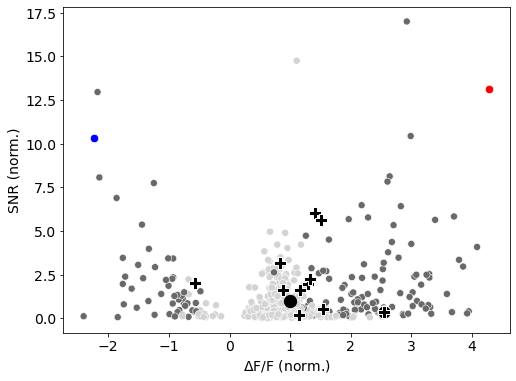

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import import_igaba_pkl

nAP='40'
singles_used_for_combos = ['F102G', 'F102Y',
              'S99A', 'S99G', 'S99C',
              'F104Y', 'F104H',
              'K253I', 'K253Y',
              'L178R', 'L178S',
              'R168P']
igabasnfr2 = 'S99A F102Y F104Y L178S'
igabasnfr2n = 'S99A F104H R168P'
f102g = 'F102G'

x_plot = 'DF/F_norm'
y_plot = 'num pixels_norm'# 'SNR_norm'
data = import_igaba_pkl(nAP, 'responsivepx-segmented-csvs') # 'ilastik-segmented-csvs' or 'responsivepx-segmented-csvs'

data_highlights_singles = data.loc[[ind for ind in data.index if ind in singles_used_for_combos]]
# data_highlights_combos = data.loc[[ind for ind in data.index if ind in highlights_combos]]
f,ax = plt.subplots(figsize=[8,6])

p=sns.color_palette()


# plot single and combo mutations
ax=sns.scatterplot(data=data, 
                   x=x_plot, y=y_plot, 
                   palette=['lightgray', 'dimgray'],
                   hue='is_combo_int',
                   s=50)

# marker for F102G
ax = sns.scatterplot(data=data.loc[[f102g]],
               x=x_plot, y=y_plot, 
               marker='o', 
               color = 'black',
               s=180)

# markers for mutants used to make combos
ax = sns.scatterplot(data=data_highlights_singles,
               x=x_plot, y=y_plot, 
               marker='P',
               color = 'black',
               s=150)

# marker for igabasnfr2
ax = sns.scatterplot(data=data.loc[[igabasnfr2]],
               x=x_plot, y=y_plot, 
               marker='o', 
               color = 'red',
               s=70)

# marker for igabasnfr2n
ax = sns.scatterplot(data=data.loc[[igabasnfr2n]],
               x=x_plot, y=y_plot, 
               marker='o', 
               color = 'blue',
               s=70)


# marker for igabasnfr
plt.scatter(1,1,marker='o', color='black', s=150)

ax.get_legend().remove()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_xlabel('$\Delta$F/F (norm.)', fontsize=14)
ax.set_ylabel('SNR (norm.)', fontsize=14)

f.savefig('figs/screening_scatter_{}_vs_{}.pdf'.format(x_plot.replace('/','_'),y_plot.replace('/','_')))